In [2]:
library(GA)

In [3]:
fitness_function_instance <- function(chromosome, instance) {
  items <- instance$items
  bin_capacity <- instance$bin_capacity
  bins <- list()
  current_bin <- 1
  bins[[current_bin]] <- 0

  for (i in seq_along(chromosome)) {
    item_index <- chromosome[i]
    item <- items[item_index]
    if (bins[[current_bin]] + item <= bin_capacity) {
      bins[[current_bin]] <- bins[[current_bin]] + item
    } else {
      current_bin <- current_bin + 1
      bins[[current_bin]] <- item
    }
  }

  total_space_used <- sum(unlist(bins))
  total_items <- sum(items)
  unused_space_penalty <- (total_space_used - total_items) / bin_capacity
  num_bins <- length(bins)
  
  return(-num_bins - unused_space_penalty)  # Ajuste para penalizar espacio no utilizado
}


In [4]:
fitness <- function(solution) {
  return(-bin_packing_fitness(solution, item_sizes, bin_capacity))
}

In [5]:
read_bin_packing_instance <- function(filename) {
  lines <- readLines(filename)
  P <- as.integer(lines[1])  # Número de instancias de problemas
  problems <- list()
  index <- 2
  for (i in 1:P) {
    problem_id <- trimws(lines[index])
    index <- index + 1
    bin_info <- strsplit(trimws(lines[index]), "\\s+")[[1]]
    bin_capacity <- as.numeric(bin_info[1])
    num_items <- as.integer(bin_info[2])
    best_known_solution <- as.integer(bin_info[3])
    index <- index + 1
    items <- numeric(num_items)
    for (j in 1:num_items) {
      items[j] <- as.numeric(trimws(lines[index]))
      index <- index + 1
    }
    problems[[i]] <- list(
      problem_id = problem_id,
      bin_capacity = bin_capacity,
      num_items = num_items,
      best_known_solution = best_known_solution,
      items = items
    )
  }
  return(problems)
}

In [6]:
file_path <- "./instances/binpack1.txt"
instances <- read_bin_packing_instance(file_path)

Warning message in readLines(filename):
"incomplete final line found on './instances/binpack1.txt'"


In [7]:
instances[1]

[[1]]
[[1]]$problem_id
[1] "u120_00"

[[1]]$bin_capacity
[1] 150

[[1]]$num_items
[1] 120

[[1]]$best_known_solution
[1] 48

[[1]]$items
  [1] 42 69 67 57 93 90 38 36 45 42 33 79 27 57 44 84 86 92 46 38 85 33 82 73 49
 [26] 70 59 23 57 72 74 69 33 42 28 46 30 64 29 74 41 49 55 98 80 32 25 38 82 30
 [51] 35 39 57 84 62 50 55 27 30 36 20 78 47 26 45 41 58 98 91 96 73 84 37 93 91
 [76] 43 73 85 81 79 71 80 76 83 41 78 70 23 42 87 43 84 60 55 49 78 73 62 36 44
[101] 94 69 32 96 70 84 58 78 25 80 58 66 83 24 98 60 42 43 43 39

In [8]:
instance <- instances[[1]]  # Por ejemplo, la primera instancia
items <- instance$items
bin_capacity <- instance$bin_capacity
n_items <- instance$num_items

ga_result <- ga(
  type = "permutation",
  fitness = function(chromosome) fitness_function_instance(chromosome, instance),
  lower = 1,
  upper = n_items,
  popSize = 100,  # Incrementa el tamaño de la población
  maxiter = 10000,  # Incrementa el número de generaciones
  run = 100       # Incrementa la cantidad de generaciones sin mejora
)
summary(ga_result)
best_solution <- ga_result@solution
best_solution_fitness <- -ga_result@fitnessValue
cat("Mejor solución encontrada (índices de ítems):", best_solution, "\n")
cat("Número mínimo de contenedores utilizados:", best_solution_fitness, "\n")

-- Genetic Algorithm ------------------- 

GA settings: 
Type                  =  permutation 
Population size       =  100 
Number of generations =  10000 
Elitism               =  5 
Crossover probability =  0.8 
Mutation probability  =  0.1 

GA results: 
Iterations             = 256 
Fitness function value = -53 
Solutions = 
     x1 x2  x3 x4  x5  x6  x7  x8  x9 x10  ...  x119 x120
[1,] 23  8 110 85  35  41 105  99  89  21         51   22
[2,] 23  8 110 85  35  41 105  99  89  28         51   22
[3,] 22 51  23 35   8 110  16 120  41 105         83   85
[4,] 51 23  41 35   8 110 105  99  89  60         85   22
[5,] 51 23  35 95 102  71  24  25 100   7         85   22

Mejor soluci<U+00F3>n encontrada (<U+00ED>ndices de <U+00ED>tems): 23 23 22 51 51 8 8 51 23 23 110 110 23 41 35 85 85 35 35 95 35 35 8 8 102 41 41 110 110 71 105 105 16 105 24 99 99 120 99 25 89 89 41 89 100 21 28 105 60 7 59 16 99 69 63 11 120 89 57 64 9 60 60 28 9 64 69 69 16 11 63 57 57 120 59 7 75 75 75 21 37 73 73 73 37 32 12 12 12 32 10 47 47 47 10 52 79 79 79 52 26 43 43 43 26 17 30 30 30 17 29 65 65 65 29 96 33 33 33 96 4 78 78 78 4 92 107 107 107 92 88 49 49 49 88 50 34 34 34 50 34 50 50 50 34 49 88 88 88 49 107 92 92 92 107 78 4 4 4 78 33 96 96 96 33 65 29 29 29 65 30 17 17 17 30 43 26 26 26 43 79 52 52 52 79 47 10 10 10 47 12 32 32 32 12 73 37 37 37 73 75 21 21 21 75 120 59 59 59 120 16 11 11 11 16 28 9 9 9 28 57 64 64 64 57 69 63 63 63 69 60 7 7 7 60 100 100 100 100 89 25 25 25 25 99 24 24 24 24 105 71 71 71 71 41 102 102 102 102 110 95 95 95 95 8 39 39 39 39 39 14 14 14 14 14 108 108 108 108 108 40 40 40 40 40 81 81 81 81 81 90 90 90 90 90 115 115 115 115 115 109 109 109 1

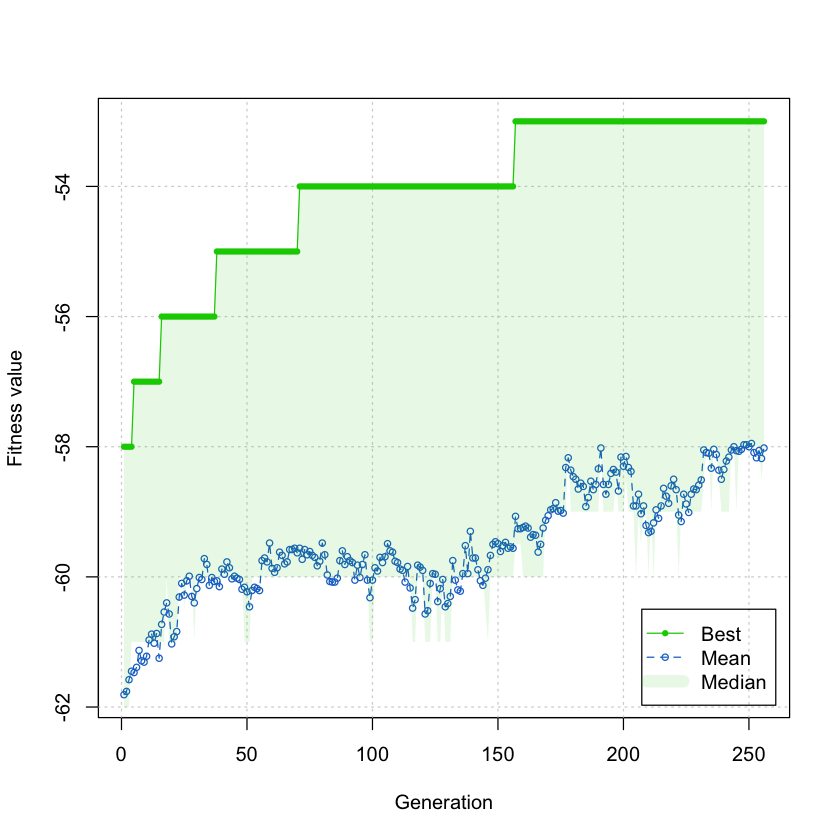

In [9]:
plot(ga_result)


In [20]:
ga_result <- ga(
  type = "permutation",
  fitness = function(chromosome) fitness_function_instance(chromosome, instance),
  lower = 1,
  upper = n_items,
  popSize = 100,
  maxiter = 500,
  run = 100,
  pmutation = 0.2,  # Tasa de mutación
  crossover = gareal_blxCrossover,  # Método de cruce
  selection = gareal_lrSelection  # Método de selección
)
summary(ga_result)
best_solution <- ga_result@solution
best_solution_fitness <- -ga_result@fitnessValue
cat("Mejor solución encontrada (índices de ítems):", best_solution, "\n")
cat("Número mínimo de contenedores utilizados:", best_solution_fitness, "\n")

ERROR: Error in if (bins[[current_bin]] + item <= bin_capacity) {: valor ausente donde TRUE/FALSE es necesario


In [19]:
best_overall_solution <- NULL
best_overall_fitness <- Inf

for (i in 1:10) {  # Ejecutar el GA 10 veces
  ga_result <- ga(
    type = "permutation",
    fitness = function(chromosome) fitness_function_instance(chromosome, instance),
    lower = 1,
    upper = n_items,
    popSize = 100,
    maxiter = 500,
    run = 100
  )
  
  current_fitness <- -ga_result@fitnessValue
  if (current_fitness < best_overall_fitness) {
    best_overall_fitness <- current_fitness
    best_overall_solution <- ga_result@solution
  }
}

cat("Mejor solución encontrada después de múltiples ejecuciones:", best_overall_solution, "\n")
cat("Número mínimo de contenedores utilizados:", best_overall_fitness, "\n")


Mejor soluci<U+00F3>n encontrada despu<U+00E9>s de m<U+00FA>ltiples ejecuciones: 83 57 70 83 70 61 83 26 101 13 26 13 37 26 65 30 120 65 120 28 65 108 103 55 108 55 87 108 114 105 118 114 118 62 114 115 80 57 115 57 95 115 33 83 101 33 101 111 33 34 26 30 34 30 21 34 117 65 103 117 103 102 117 59 108 105 59 105 31 59 60 114 80 60 80 36 60 61 115 83 61 83 40 61 37 33 26 37 26 74 37 28 34 65 28 65 49 28 87 117 108 87 108 93 87 62 59 114 62 114 47 62 95 60 115 95 115 5 95 111 61 33 111 33 72 111 21 37 34 21 34 73 21 102 28 117 102 117 82 102 31 87 59 31 59 6 31 36 62 60 36 60 89 36 40 95 61 40 61 44 40 74 111 37 74 37 56 74 49 21 28 49 28 20 49 93 102 87 93 87 8 93 47 31 62 47 62 77 47 5 36 95 5 95 3 5 72 40 111 72 111 110 72 73 74 21 73 21 51 73 82 49 102 82 102 68 82 6 93 31 6 31 86 6 89 47 36 89 36 119 89 44 5 40 44 40 99 44 56 72 74 56 74 107 56 20 73 49 20 49 35 20 8 82 93 8 93 64 8 77 6 47 77 47 76 77 3 89 5 3 5 92 3 110 44 72 110 72 91 110 51 56 73 51 73 23 51 68 20 82 68 82 41 68 